<h1>
    <font color=0000FF>
        Using Metabolites in the Wastewater to measure Drug Consumption - Machine Learning Regression
    </font>
</h1>
<h3>
    <font color=89CFF0>
        An Open Source Data Project using Data from the European Monitoring Centre for Drugs and Drug Addiction (EMCDDA) and the SCORE network
    </font>
</h3>      


<img src="https://cdn.pixabay.com/photo/2018/01/17/20/22/analytics-3088958_960_720.jpg">
Picture taken from <a href="https://pixabay.com/de/illustrations/analyse-information-innovation-3088958/">Pixabay</a>, from the user <a href="https://pixabay.com/de/users/xresch-7410129/?tab=most-relevant&pagi=1">"xresch"</a>.

<h2>
    <font color=0096FF>
        Content & Structure<a id='start'></a>
    </font>
</h2>
<h3>
    <font color=0096FF>
        <p>
            <a href='#first_chapter'>1. Library and Data Import</a>         
        <p>
            <a href='#second_chapter'>2. Creating the Dataframes</a>
        <p>
            <a href='#third_chapter'>3. Machine Learning Preparation</a>
        <p>
            <a href='#fourth_chapter'>4. Machine Learning Regression</a>
        <p>
            <a href='#fifth_chapter'>5. Final Thoughts</a>
    </font>
</h3>  

<h3>
    <font color=0096FF>
        Recap
    </font>
</h3>
<p>
    At the current stage of the analysis, we want tested the correlation of the daily mean of the specific drug combinatinos (Cannabis & MDMA, Cocaina & MDMA, and Cocaine & Cannabis). However, this time we create new datasets to test the daily measures as well.
<p>
    <b>The current hypothesis:</b>
<ul>
    <li>
        <b>If the consumption of Cannabis increases, the consumption of MDMA and Cocaine increases as well.</b>
    </li>
</ul>

<h2>
    <font color=0096FF>
        <a href='#start'>1. Library and Data Import</a><a id='first_chapter'></a>
    </font>
</h2>

In [1]:
# Importing libraries

import pandas as pd
from pandas.api.types import infer_dtype
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Setting up options

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [3]:
# Setting up the path for import/export/etc.

path = r'X:/Data_Analytic/JUPYTER/Achievement 6'

In [4]:
# Importing the dataframes

df_wastewater = pd.read_pickle(os.path.join(path,'02 Data','02 Prepared Data','df_wastewater_tagged_post_6-3.pkl'))

In [5]:
# Checking the dataframe

df_wastewater.head()
df_wastewater.shape
df_wastewater.info()
df_wastewater.isnull().sum()
dup_check = df_wastewater.duplicated()
dup_check.shape

,year,metabolite,SiteID,country,city,latitude,longitude,population,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean,Consumption flag,avg diff weekend-weekday,Name
0,2021,amphetamine,AT001,AT,Graz,47.070713,15.439504,487040,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57,mid consumption,-2.55,Austria
1,2021,cannabis,AT001,AT,Graz,47.070713,15.439504,487040,54.77,80.42,60.1,53.88,50.46,77.04,233.51,122.9,60.37,87.17,mid consumption,-62.53,Austria
2,2021,cocaine,AT001,AT,Graz,47.070713,15.439504,487040,127.6,121.48,137.75,174.94,179.55,117.31,111.91,120.33,152.39,138.65,high consumption,32.06,Austria
3,2021,MDMA,AT001,AT,Graz,47.070713,15.439504,487040,5.82,4.53,5.27,16.56,17.37,10.14,7.83,6.06,12.33,9.64,mid consumption,6.27,Austria
4,2021,methamphetamine,AT001,AT,Graz,47.070713,15.439504,487040,12.44,11.24,14.99,9.33,18.66,9.33,15.66,13.11,13.08,13.09,mid consumption,-0.03,Austria


(2569, 21)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2568
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2569 non-null   Int64  
 1   metabolite                2569 non-null   string 
 2   SiteID                    2569 non-null   string 
 3   country                   2569 non-null   object 
 4   city                      2569 non-null   string 
 5   latitude                  2569 non-null   Float64
 6   longitude                 2569 non-null   Float64
 7   population                2569 non-null   int32  
 8   Wednesday                 2569 non-null   Float64
 9   Thursday                  2569 non-null   Float64
 10  Friday                    2569 non-null   Float64
 11  Saturday                  2569 non-null   Float64
 12  Sunday                    2569 non-null   Float64
 13  Monday                    2569 non-null   Float64
 14  Tuesday 

year                        0
metabolite                  0
SiteID                      0
country                     0
city                        0
latitude                    0
longitude                   0
population                  0
Wednesday                   0
Thursday                    0
Friday                      0
Saturday                    0
Sunday                      0
Monday                      0
Tuesday                     0
Weekday mean                0
Weekend mean                0
Daily mean                  0
Consumption flag            0
avg diff weekend-weekday    0
Name                        0
dtype: int64

(2569,)

In [6]:
# Due to problems in the past with Float64 and seaborn, I will convert all Float64 data into float64

float_conv = ['latitude','longitude','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Weekday mean','Weekend mean','avg diff weekend-weekday']

df_wastewater['year'] = df_wastewater['year'].astype(int)

for i in float_conv:
    df_wastewater[i]=df_wastewater[i].astype(float)

df_wastewater.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2568
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2569 non-null   int32  
 1   metabolite                2569 non-null   string 
 2   SiteID                    2569 non-null   string 
 3   country                   2569 non-null   object 
 4   city                      2569 non-null   string 
 5   latitude                  2569 non-null   float64
 6   longitude                 2569 non-null   float64
 7   population                2569 non-null   int32  
 8   Wednesday                 2569 non-null   float64
 9   Thursday                  2569 non-null   float64
 10  Friday                    2569 non-null   float64
 11  Saturday                  2569 non-null   float64
 12  Sunday                    2569 non-null   float64
 13  Monday                    2569 non-null   float64
 14  Tuesday 

<h2>
    <font color=0096FF>
        <a href='#start'>2. Creating the Dataframes</a><a id='second_chapter'></a>
    </font>
</h2>

The dataframes are according to the drug combinations: Cocaine & Cannabis, Cocaine & MDMA, and MDMA and Cannabis. The process is similar to the process of an earlier notebook. First, the drug specific dataframes are created, then they're going to merge into each other. However, the dataframes will have all measurements this time.

In [7]:
# Creating the drug specific dataframes

df_coc=df_wastewater.loc[df_wastewater['metabolite']=='cocaine'][['year','SiteID','country','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Weekday mean','Weekend mean','Daily mean']]
df_can=df_wastewater.loc[df_wastewater['metabolite']=='cannabis'][['year','SiteID','country','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Weekday mean','Weekend mean','Daily mean']]
df_mdm=df_wastewater.loc[df_wastewater['metabolite']=='MDMA'][['year','SiteID','country','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Weekday mean','Weekend mean','Daily mean']]

df_drug = [df_coc,df_can,df_mdm]

In [8]:
# Changing the column names

rename_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Weekday mean','Weekend mean','Daily mean']
rename_tag = ['Coc ','Can ','MDM ']

for i in range(0,3):
    df_drug[i].rename(columns={
        rename_list[0]:rename_tag[i]+rename_list[0],
        rename_list[1]:rename_tag[i]+rename_list[1],
        rename_list[2]:rename_tag[i]+rename_list[2],
        rename_list[3]:rename_tag[i]+rename_list[3],
        rename_list[4]:rename_tag[i]+rename_list[4],
        rename_list[5]:rename_tag[i]+rename_list[5],
        rename_list[6]:rename_tag[i]+rename_list[6],
        rename_list[7]:rename_tag[i]+rename_list[7],
        rename_list[8]:rename_tag[i]+rename_list[8],
        rename_list[9]:rename_tag[i]+rename_list[9]},inplace=True);

In [9]:
# Creating the yearID for the merge

for i in range(0,3):
    df_drug[i]['yearID'] = df_drug[i]['SiteID'].astype(str)+df_drug[i]['year'].astype(str)

In [10]:
# Checking if everything worked

for i in range(0,3):
    df_drug[i].head()
    df_drug[i].shape

,year,SiteID,country,Coc Monday,Coc Tuesday,Coc Wednesday,Coc Thursday,Coc Friday,Coc Saturday,Coc Sunday,Coc Weekday mean,Coc Weekend mean,Coc Daily mean,yearID
2,2021,AT001,AT,117.31,111.91,127.60,121.48,137.75,174.94,179.55,120.33,152.39,138.65,AT0012021
7,2020,AT001,AT,113.55,90.27,98.22,107.09,138.97,277.65,141.82,98.53,168.00,138.22,AT0012020
12,2019,AT001,AT,108.25,131.53,124.76,117.22,88.68,334.45,174.45,124.50,176.46,154.19,AT0012019
17,2021,AT002,AT,191.52,166.59,178.82,165.84,192.33,265.02,273.44,170.42,230.58,204.80,AT0022021
22,2020,AT002,AT,184.96,197.85,198.51,191.85,188.40,252.67,258.04,196.07,221.02,210.32,AT0022020


(602, 14)

,year,SiteID,country,Can Monday,Can Tuesday,Can Wednesday,Can Thursday,Can Friday,Can Saturday,Can Sunday,Can Weekday mean,Can Weekend mean,Can Daily mean,yearID
1,2021,AT001,AT,77.04,233.51,54.77,80.42,60.10,53.88,50.46,122.90,60.37,87.17,AT0012021
6,2020,AT001,AT,58.17,52.23,46.87,48.68,44.34,67.07,37.48,49.26,51.77,50.69,AT0012020
11,2019,AT001,AT,54.02,55.90,66.09,63.65,44.47,88.09,45.07,61.88,57.91,59.61,AT0012019
16,2021,AT002,AT,40.21,50.06,44.93,19.69,34.03,38.92,25.62,38.23,34.70,36.21,AT0022021
21,2020,AT002,AT,55.98,53.96,45.97,35.34,40.26,34.64,36.07,45.09,41.74,43.17,AT0022020


(215, 14)

,year,SiteID,country,MDM Monday,MDM Tuesday,MDM Wednesday,MDM Thursday,MDM Friday,MDM Saturday,MDM Sunday,MDM Weekday mean,MDM Weekend mean,MDM Daily mean,yearID
3,2021,AT001,AT,10.14,7.83,5.82,4.53,5.27,16.56,17.37,6.06,12.33,9.64,AT0012021
8,2020,AT001,AT,14.85,9.60,6.13,7.97,9.37,30.93,20.11,7.90,18.81,14.14,AT0012020
13,2019,AT001,AT,14.94,10.28,8.88,8.56,8.21,43.72,27.10,9.24,23.49,17.39,AT0012019
18,2021,AT002,AT,4.38,3.45,2.20,1.54,1.91,7.78,8.64,2.40,5.68,4.27,AT0022021
23,2020,AT002,AT,12.72,8.85,5.41,4.23,4.49,11.07,10.09,6.16,9.59,8.12,AT0022020


(590, 14)

In [11]:
# Merging the dataframes

df_cocxcan = pd.merge(df_drug[0],df_drug[1],how='inner',on='yearID')
df_cocxmdm = pd.merge(df_drug[0],df_drug[2],how='inner',on='yearID')
df_mdmxcan = pd.merge(df_drug[2],df_drug[1],how='inner',on='yearID')

In [12]:
# Changing names and dropping columns of the created dataframes

df_cocxcan.rename(columns={'year_x':'year','SiteID_x':'SiteID','country_x':'country'},inplace=True)
df_cocxmdm.rename(columns={'year_x':'year','SiteID_x':'SiteID','country_x':'country'},inplace=True)
df_mdmxcan.rename(columns={'year_x':'year','SiteID_x':'SiteID','country_x':'country'},inplace=True)

df_cocxcan = df_cocxcan.drop(['year_y','SiteID_y','country_y'],axis=1)
df_cocxmdm = df_cocxmdm.drop(['year_y','SiteID_y','country_y'],axis=1)
df_mdmxcan = df_mdmxcan.drop(['year_y','SiteID_y','country_y'],axis=1)

In [13]:
# Checking if everything worked

df_cocxcan.head()
df_cocxcan.shape
df_cocxmdm.head()
df_cocxmdm.shape
df_mdmxcan.head()
df_mdmxcan.shape

,year,SiteID,country,Coc Monday,Coc Tuesday,Coc Wednesday,Coc Thursday,Coc Friday,Coc Saturday,Coc Sunday,Coc Weekday mean,Coc Weekend mean,Coc Daily mean,yearID,Can Monday,Can Tuesday,Can Wednesday,Can Thursday,Can Friday,Can Saturday,Can Sunday,Can Weekday mean,Can Weekend mean,Can Daily mean
0,2021,AT001,AT,117.31,111.91,127.60,121.48,137.75,174.94,179.55,120.33,152.39,138.65,AT0012021,77.04,233.51,54.77,80.42,60.10,53.88,50.46,122.90,60.37,87.17
1,2020,AT001,AT,113.55,90.27,98.22,107.09,138.97,277.65,141.82,98.53,168.00,138.22,AT0012020,58.17,52.23,46.87,48.68,44.34,67.07,37.48,49.26,51.77,50.69
2,2019,AT001,AT,108.25,131.53,124.76,117.22,88.68,334.45,174.45,124.50,176.46,154.19,AT0012019,54.02,55.90,66.09,63.65,44.47,88.09,45.07,61.88,57.91,59.61
3,2021,AT002,AT,191.52,166.59,178.82,165.84,192.33,265.02,273.44,170.42,230.58,204.80,AT0022021,40.21,50.06,44.93,19.69,34.03,38.92,25.62,38.23,34.70,36.21
4,2020,AT002,AT,184.96,197.85,198.51,191.85,188.40,252.67,258.04,196.07,221.02,210.32,AT0022020,55.98,53.96,45.97,35.34,40.26,34.64,36.07,45.09,41.74,43.17


(210, 24)

,year,SiteID,country,Coc Monday,Coc Tuesday,Coc Wednesday,Coc Thursday,Coc Friday,Coc Saturday,Coc Sunday,Coc Weekday mean,Coc Weekend mean,Coc Daily mean,yearID,MDM Monday,MDM Tuesday,MDM Wednesday,MDM Thursday,MDM Friday,MDM Saturday,MDM Sunday,MDM Weekday mean,MDM Weekend mean,MDM Daily mean
0,2021,AT001,AT,117.31,111.91,127.60,121.48,137.75,174.94,179.55,120.33,152.39,138.65,AT0012021,10.14,7.83,5.82,4.53,5.27,16.56,17.37,6.06,12.33,9.64
1,2020,AT001,AT,113.55,90.27,98.22,107.09,138.97,277.65,141.82,98.53,168.00,138.22,AT0012020,14.85,9.60,6.13,7.97,9.37,30.93,20.11,7.90,18.81,14.14
2,2019,AT001,AT,108.25,131.53,124.76,117.22,88.68,334.45,174.45,124.50,176.46,154.19,AT0012019,14.94,10.28,8.88,8.56,8.21,43.72,27.10,9.24,23.49,17.39
3,2021,AT002,AT,191.52,166.59,178.82,165.84,192.33,265.02,273.44,170.42,230.58,204.80,AT0022021,4.38,3.45,2.20,1.54,1.91,7.78,8.64,2.40,5.68,4.27
4,2020,AT002,AT,184.96,197.85,198.51,191.85,188.40,252.67,258.04,196.07,221.02,210.32,AT0022020,12.72,8.85,5.41,4.23,4.49,11.07,10.09,6.16,9.59,8.12


(581, 24)

,year,SiteID,country,MDM Monday,MDM Tuesday,MDM Wednesday,MDM Thursday,MDM Friday,MDM Saturday,MDM Sunday,MDM Weekday mean,MDM Weekend mean,MDM Daily mean,yearID,Can Monday,Can Tuesday,Can Wednesday,Can Thursday,Can Friday,Can Saturday,Can Sunday,Can Weekday mean,Can Weekend mean,Can Daily mean
0,2021,AT001,AT,10.14,7.83,5.82,4.53,5.27,16.56,17.37,6.06,12.33,9.64,AT0012021,77.04,233.51,54.77,80.42,60.10,53.88,50.46,122.90,60.37,87.17
1,2020,AT001,AT,14.85,9.60,6.13,7.97,9.37,30.93,20.11,7.90,18.81,14.14,AT0012020,58.17,52.23,46.87,48.68,44.34,67.07,37.48,49.26,51.77,50.69
2,2019,AT001,AT,14.94,10.28,8.88,8.56,8.21,43.72,27.10,9.24,23.49,17.39,AT0012019,54.02,55.90,66.09,63.65,44.47,88.09,45.07,61.88,57.91,59.61
3,2021,AT002,AT,4.38,3.45,2.20,1.54,1.91,7.78,8.64,2.40,5.68,4.27,AT0022021,40.21,50.06,44.93,19.69,34.03,38.92,25.62,38.23,34.70,36.21
4,2020,AT002,AT,12.72,8.85,5.41,4.23,4.49,11.07,10.09,6.16,9.59,8.12,AT0022020,55.98,53.96,45.97,35.34,40.26,34.64,36.07,45.09,41.74,43.17


(200, 24)

<h2>
    <font color=0096FF>
        <a href='#start'>3. Machine Learning Preparation</a><a id='third_chapter'></a>
    </font>
</h2>

One thing, that is really unfortunate, is the few observations in each dataframe. The original one contained around 2600 measurements, however those were differentiated by 5 drugs. The drug combination dataframes contain 581, 210 and 200 measurements. <b><i>The models created will struggle with so few measurements.</i></b>

In [14]:
# Preparation

df_drugxdrug = [df_cocxcan,df_cocxmdm,df_mdmxcan]
drugxdrug_list = ['Cocaine & Cannabis','Cocaine & MDMA','MDMA & Cannabis']
add_title = ' in mg/1000p/day | day specific'
save_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Weekday mean','Weekend mean','Daily mean']

coc_hit_list = df_cocxcan.columns[3:13].tolist()
can_hit_list = df_cocxcan.columns[14:].tolist()
mdm_hit_list = df_mdmxcan.columns[3:13].tolist()



[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

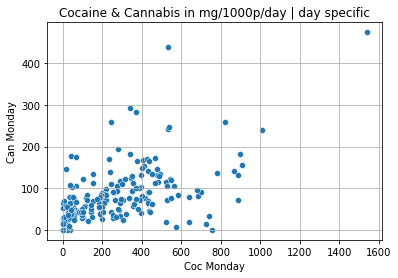

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

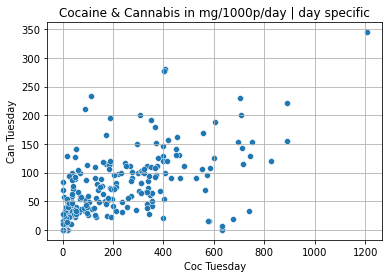

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

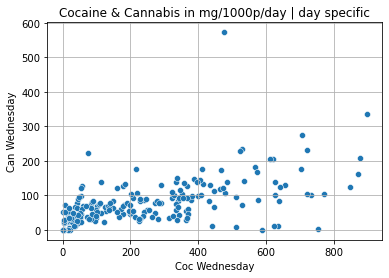

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

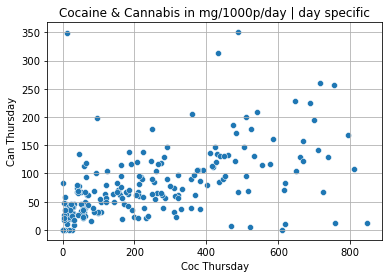

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

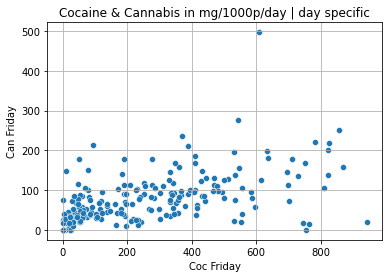

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

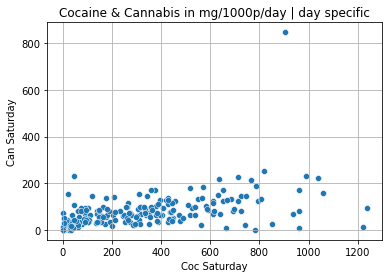

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

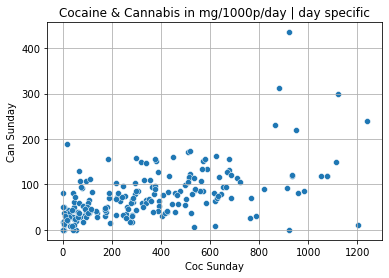

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

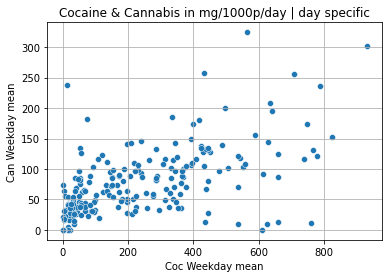

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

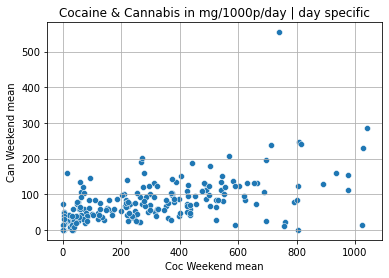

[Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day | day specific')]

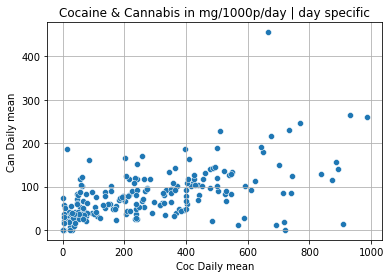

In [15]:
# Scatterplots in preparation for the regression model combination Cocaine & Cannabis
x = 0
for i in range(0,10):
    sns.scatterplot(x=coc_hit_list[i],y=can_hit_list[i],data=df_drugxdrug[x]).set(title=drugxdrug_list[x]+add_title);
    plt.grid();
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','04 Machine Learning',drugxdrug_list[x]+' Scatterplot '+save_list[i]+'.jpg'),bbox_inches='tight')
    plt.show();

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

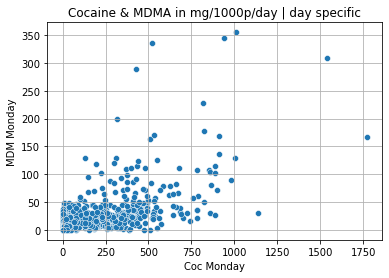

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

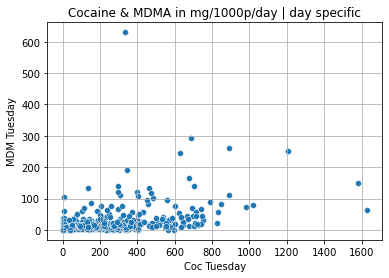

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

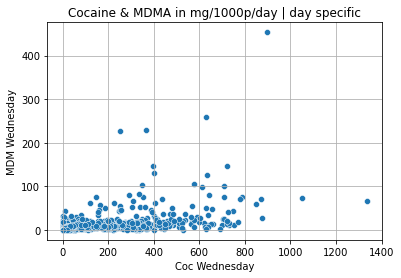

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

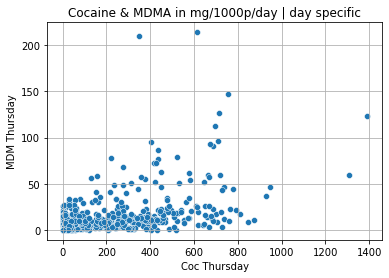

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

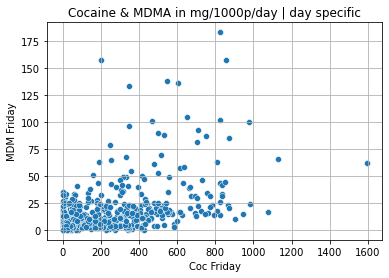

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

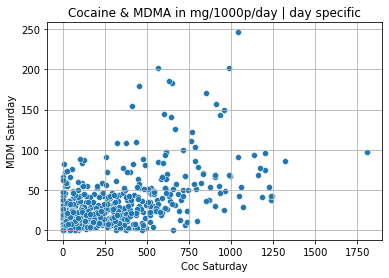

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

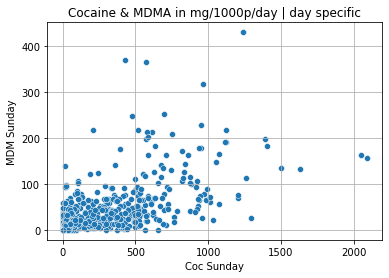

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

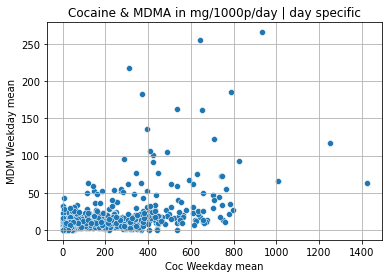

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

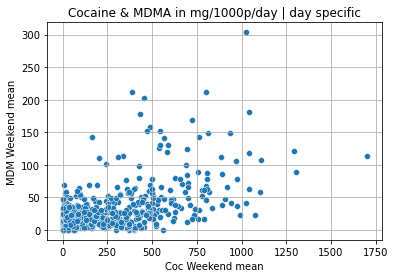

[Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day | day specific')]

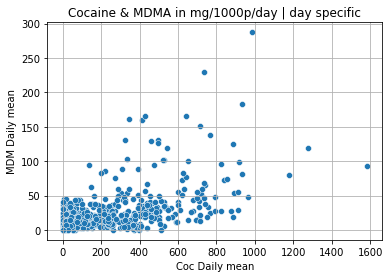

In [16]:
x = 1
for i in range(0,10):
    sns.scatterplot(x=coc_hit_list[i],y=mdm_hit_list[i],data=df_drugxdrug[x]).set(title=drugxdrug_list[x]+add_title);
    plt.grid();
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','04 Machine Learning',drugxdrug_list[x]+' Scatterplot '+save_list[i]+'.jpg'),bbox_inches='tight')
    plt.show();

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

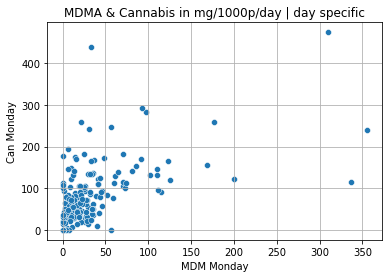

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

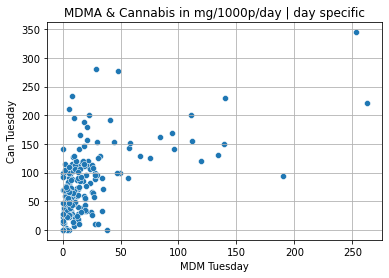

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

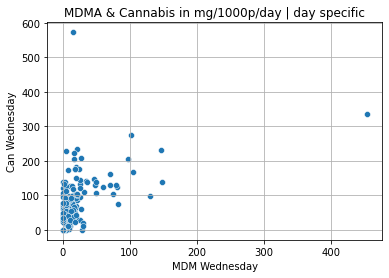

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

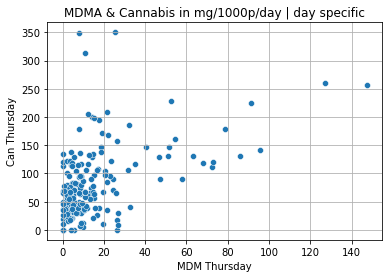

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

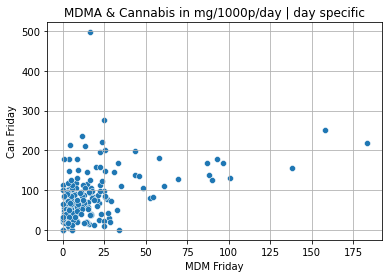

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

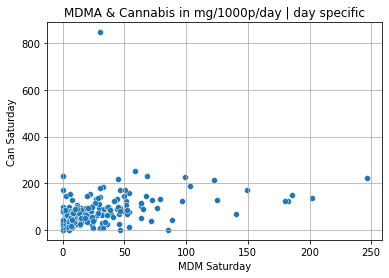

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

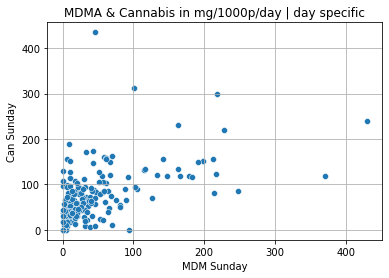

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

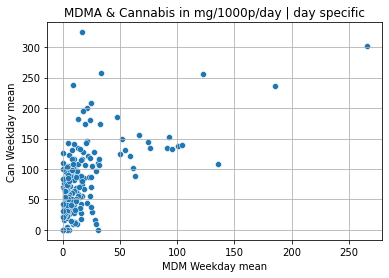

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

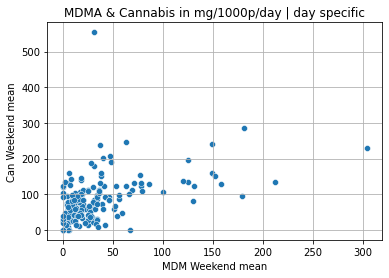

[Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day | day specific')]

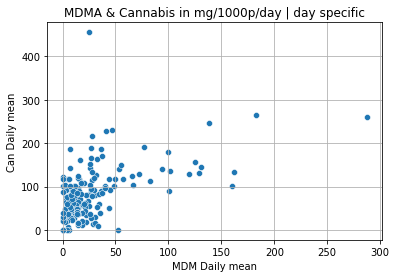

In [17]:
x = 2
for i in range(0,10):
    sns.scatterplot(x=mdm_hit_list[i],y=can_hit_list[i],data=df_drugxdrug[x]).set(title=drugxdrug_list[x]+add_title);
    plt.grid();
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','04 Machine Learning',drugxdrug_list[x]+' Scatterplot '+save_list[i]+'.jpg'),bbox_inches='tight')
    plt.show();

<h2>
    <font color=0096FF>
        <a href='#start'>4. Machine Learning Regression</a><a id='fourth_chapter'></a>
    </font>
</h2>

As stated previously, the few observations are frustrating. As a workaround, I will create an array for each drug combination, containing the daily measurements. To explain, this means the measurements for Monday to Sunday are combined into one array for each drug combination. In this case we'll get 210*7 = 1470 observations for the combination Cocaine and Cannabis, 581*7 = 4067 observations for the combination Cocaine and MDMA, and 200*7 = 1400 observations for the combination MDMA and Cannabis. Hopefully, this will support the regression modeling process.
<p>
    <font color=FF0000>
        <b>Please note that 'train' means 'training'.</b>
    </font>


In [18]:
# Creating the final arrays as a list, setting up identifiers and arrays to stack into the final arrays.
# The for loop creates empty arrays which will be filled with the data from the daily measurements and afterwards stacked
# into the final array lists.

arrays_X = []
arrays_y = []

df_identifier = [df_cocxcan.columns[3:13].tolist(),df_cocxcan.columns[14:].tolist(),df_mdmxcan.columns[3:13].tolist()]

arrays_add_X = [[],[],[]]
arrays_add_y = [[],[],[]]

targeta=[0,0,2]
targetb=[1,2,1]

for i in range(0,3):
    arrays_X.append(np.zeros(shape=(0,0)))
    arrays_y.append(np.zeros(shape=(0,0)))

In [19]:
# The data is added as an array to the empty stack lists

for g in range(0,3):
    for i in range(0,7):
        arrays_add_X[g].append(df_drugxdrug[g][df_identifier[targeta[g]][i]].values.reshape(-1,1))
        arrays_add_y[g].append(df_drugxdrug[g][df_identifier[targetb[g]][i]].values.reshape(-1,1))

In [20]:
# Test if everything worked - If everything worked, the number of x rows from the drug combination dataframes should be 
# displayed

for g in range(0,3):
    for i in range(0,7):
        print(len(arrays_add_X[g][i]),len(arrays_add_y[g][i]))

210 210
210 210
210 210
210 210
210 210
210 210
210 210
581 581
581 581
581 581
581 581
581 581
581 581
581 581
200 200
200 200
200 200
200 200
200 200
200 200
200 200


In [21]:
# Stacking the arrays of the list into the final arrays

for i in range(0,3):
    arrays_X[i] = np.vstack((
        arrays_add_X[i][0],
        arrays_add_X[i][1],
        arrays_add_X[i][2],
        arrays_add_X[i][3],
        arrays_add_X[i][4],
        arrays_add_X[i][5],
        arrays_add_X[i][6],))
    
    arrays_y[i] = np.vstack((
        arrays_add_y[i][0],
        arrays_add_y[i][1],
        arrays_add_y[i][2],
        arrays_add_y[i][3],
        arrays_add_y[i][4],
        arrays_add_y[i][5],
        arrays_add_y[i][6],))

In [22]:
# Testing if the stacking process succeeded. The column on the lift represents the amount of observations of the array
# and the column on the right has the previously calculated amount of observations the arrays should have

control_adding=[210,581,200]

for i in range(0,3):
    print(len(arrays_X[i]),control_adding[i]*7)

1470 1470
4067 4067
1400 1400


<h3>
    Intermission
</h3>
<p>
    Here, dataframes regarding the combinations are created and exported to use for the Tableau analysis.

In [34]:
# Creating the dataframes

df_tableau_list = []
name_list = ['Cocaine','Cannabis','MDMA']

for i in range(0,3):
    df_tableau_list.append(pd.DataFrame(arrays_X[i],columns=[name_list[targeta[i]]]))
    df_tableau_list[i][name_list[targetb[i]]] = arrays_y[i]

In [37]:
# Checking the dataframes

for i in range(0,3):
    df_tableau_list[i].index = range(len(df_tableau_list[i]))
    df_tableau_list[i].shape
    df_tableau_list[i].head()
    

(1470, 2)

,Cocaine,Cannabis
0,117.31,77.04
1,113.55,58.17
2,108.25,54.02
3,191.52,40.21
4,184.96,55.98


(4067, 2)

,Cocaine,MDMA
0,117.31,10.14
1,113.55,14.85
2,108.25,14.94
3,191.52,4.38
4,184.96,12.72


(1400, 2)

,MDMA,Cannabis
0,10.14,77.04
1,14.85,58.17
2,14.94,54.02
3,4.38,40.21
4,12.72,55.98


In [39]:
for i in range(0,3):
    df_tableau_list[i].to_csv(os.path.join(path,'02 Data','02 Prepared Data',name_list[targeta[i]]+' x '+name_list[targetb[i]]+' relationships for Tableau.csv'),index_label='index')

<h3>
    Intermission end
</h3>
<p>

In [23]:
# The train and test environments are created as list for each individual drug combination

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

for i in range(0,3):
    X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(arrays_X[i],arrays_y[i],test_size=0.3,random_state=0)
    X_train_list.append(X_train_add)
    X_test_list.append(X_test_add)
    y_train_list.append(y_train_add)
    y_test_list.append(y_test_add)

In [24]:
# The regression objects are saved into a list for each possible drug combination

regression_list = []

for i in range(0,3):
    regression_list.append(LinearRegression())

In [25]:
# The prediction is created in a list for each possible drug combination

predict_y_list = []

for i in range(0,3):
    regression_list[i].fit(X_train_list[i],y_train_list[i])
    predict_y_list.append(regression_list[i].predict(X_test_list[i]))

LinearRegression()

LinearRegression()

LinearRegression()

Text(0.05, 0.8, 'Slope: 0.1464\nMSE: 2325.0383\nR²: 0.1636')

Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day all measurements | test prediction')

Text(0.5, 0, 'Cocaine measurements')

Text(0, 0.5, 'Cannabis measurements')

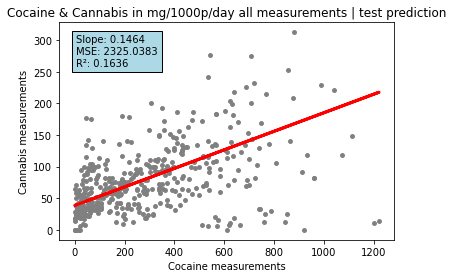

Text(0.05, 0.8, 'Slope: 0.0731\nMSE: 875.3007\nR²: 0.2706')

Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day all measurements | test prediction')

Text(0.5, 0, 'Cocaine measurements')

Text(0, 0.5, 'MDMA measurements')

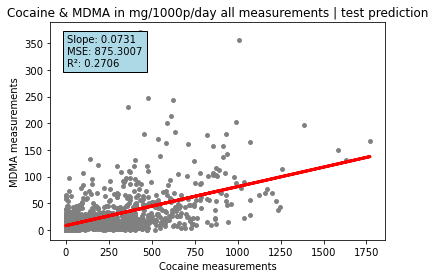

Text(0.05, 0.8, 'Slope: 0.6854\nMSE: 3562.442\nR²: 0.1419')

Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day all measurements | test prediction')

Text(0.5, 0, 'MDMA measurements')

Text(0, 0.5, 'Cannabis measurements')

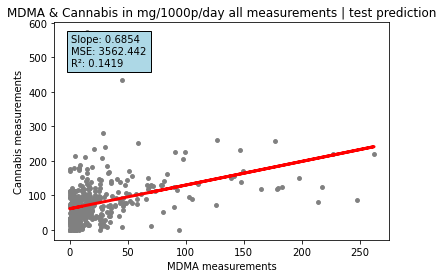

In [26]:
# A chart is created with the regression line for the prediction of the test regression. The Slope, MSE and R^2 are
# added in an additional textbox into the chart.

add_title_reg1 = ' in mg/1000p/day all measurements | test prediction'
label_reg1 = ['Cocaine measurements','Cannabis measurements','MDMA measurements']

for i in range(0,3):
    slope = round(regression_list[i].coef_[0][0].astype(float),4)
    rmse = round(mean_squared_error(y_test_list[i], predict_y_list[i]),4)
    r2 = round(r2_score(y_test_list[i], predict_y_list[i]),4)
    textbox = 'Slope: '+slope.astype(str)+'\nMSE: '+rmse.astype(str)+'\nR²: '+r2.astype(str)
    plt.scatter(X_test_list[i],y_test_list[i],color='gray',s=15)
    plt.plot(X_test_list[i],predict_y_list[i],color='red',linewidth=3)
    plt.annotate(textbox, xy=(0.05, 0.8), xycoords='axes fraction',bbox=dict(facecolor='lightblue',alpha=1))
    plt.title(drugxdrug_list[i]+add_title_reg1)
    plt.xlabel(label_reg1[targeta[i]])
    plt.ylabel(label_reg1[targetb[i]])
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','04 Machine Learning','ML '+drugxdrug_list[i]+' Test regression plot.jpg'),bbox_inches='tight')
    plt.show();

[Text(0.5, 1.0, 'Cocaine & Cannabis Delta test Prediction - Measurement')]

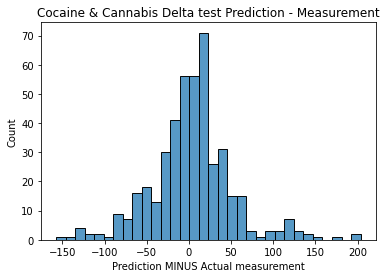

[Text(0.5, 1.0, 'Cocaine & MDMA Delta test Prediction - Measurement')]

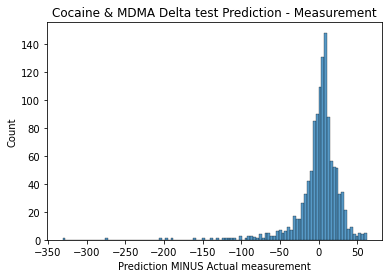

[Text(0.5, 1.0, 'MDMA & Cannabis Delta test Prediction - Measurement')]

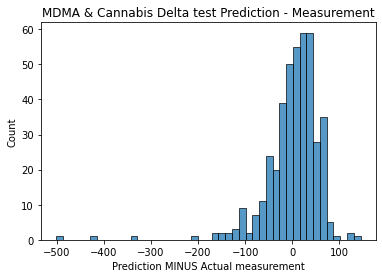

In [27]:
# To visualize the difference between the prediction and the actual measurement of the test regression model, I created
# a histogram which represents the delta (prediction - measurement) for each drug combination

comparison_act_pred_test = []

for i in range(0,3):
    comparison_act_pred_test.append(pd.DataFrame({'Actual':y_test_list[i].flatten(),'Predicted':predict_y_list[i].flatten()}))
    comparison_act_pred_test[i]['Prediction MINUS Actual measurement'] = comparison_act_pred_test[i]['Predicted'].astype(float)-comparison_act_pred_test[i]['Actual'].astype(float)
    sns.histplot(comparison_act_pred_test[i]['Prediction MINUS Actual measurement']).set(title=drugxdrug_list[i]+' Delta test Prediction - Measurement')
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','04 Machine Learning','ML '+drugxdrug_list[i]+' Test Delta histplot.jpg'),bbox_inches='tight')
    plt.show()

In [28]:
# The train prediction

predict_y_train_list = []

for i in range(0,3):
    predict_y_train_list.append(regression_list[i].predict(X_train_list[i]))

Text(0.05, 0.8, 'Slope: 0.1464\nMSE: 3305.5552\nR²: 0.2795')

Text(0.5, 1.0, 'Cocaine & Cannabis in mg/1000p/day all measurements | train prediction')

Text(0.5, 0, 'Cocaine measurements')

Text(0, 0.5, 'Cannabis measurements')

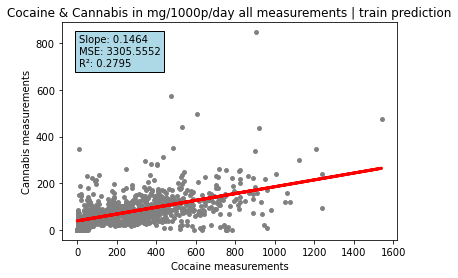

Text(0.05, 0.8, 'Slope: 0.0731\nMSE: 1116.4433\nR²: 0.2358')

Text(0.5, 1.0, 'Cocaine & MDMA in mg/1000p/day all measurements | train prediction')

Text(0.5, 0, 'Cocaine measurements')

Text(0, 0.5, 'MDMA measurements')

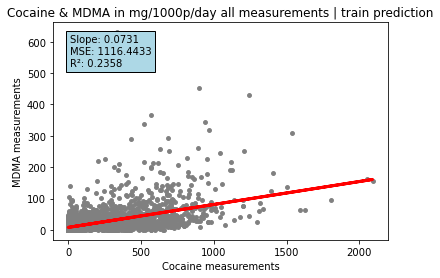

Text(0.05, 0.8, 'Slope: 0.6854\nMSE: 3270.3311\nR²: 0.2118')

Text(0.5, 1.0, 'MDMA & Cannabis in mg/1000p/day all measurements | train prediction')

Text(0.5, 0, 'MDMA measurements')

Text(0, 0.5, 'Cannabis measurements')

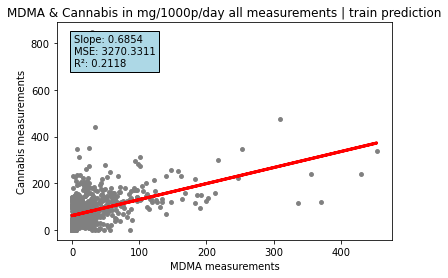

In [29]:
add_title_reg2 = ' in mg/1000p/day all measurements | train prediction'

for i in range(0,3):
    slope = round(regression_list[i].coef_[0][0].astype(float),4)
    rmse = round(mean_squared_error(y_train_list[i], predict_y_train_list[i]),4)
    r2 = round(r2_score(y_train_list[i], predict_y_train_list[i]),4)
    textbox = 'Slope: '+slope.astype(str)+'\nMSE: '+rmse.astype(str)+'\nR²: '+r2.astype(str)
    plt.scatter(X_train_list[i],y_train_list[i],color='gray',s=15)
    plt.plot(X_train_list[i],predict_y_train_list[i],color='red',linewidth=3)
    plt.annotate(textbox, xy=(0.05, 0.8), xycoords='axes fraction',bbox=dict(facecolor='lightblue',alpha=1))
    plt.title(drugxdrug_list[i]+add_title_reg2)
    plt.xlabel(label_reg1[targeta[i]])
    plt.ylabel(label_reg1[targetb[i]])
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','04 Machine Learning','ML '+drugxdrug_list[i]+' Train regression plot.jpg'),bbox_inches='tight')
    plt.show();

[Text(0.5, 1.0, 'Cocaine & Cannabis Delta train Prediction - Measurement')]

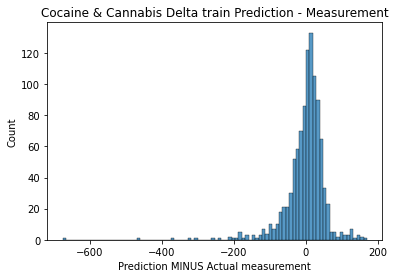

[Text(0.5, 1.0, 'Cocaine & MDMA Delta train Prediction - Measurement')]

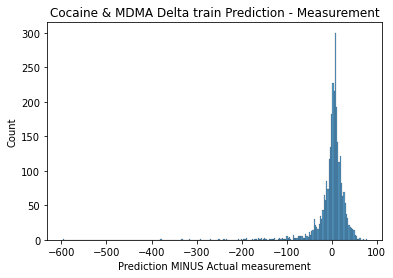

[Text(0.5, 1.0, 'MDMA & Cannabis Delta train Prediction - Measurement')]

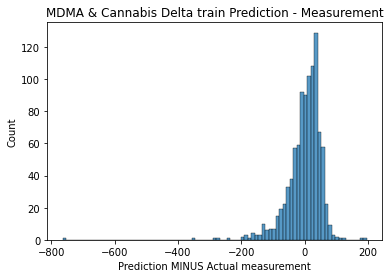

In [30]:
comparison_act_pred_train = []

for i in range(0,3):
    comparison_act_pred_train.append(pd.DataFrame({'Actual':y_train_list[i].flatten(),'Predicted':predict_y_train_list[i].flatten()}))
    comparison_act_pred_train[i]['Prediction MINUS Actual measurement'] = comparison_act_pred_train[i]['Predicted'].astype(float)-comparison_act_pred_train[i]['Actual'].astype(float)
    sns.histplot(comparison_act_pred_train[i]['Prediction MINUS Actual measurement']).set(title=drugxdrug_list[i]+' Delta train Prediction - Measurement')
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','04 Machine Learning','ML '+drugxdrug_list[i]+' Train Delta histplot.jpg'),bbox_inches='tight')
    plt.show()

<h2>
    <font color=0096FF>
        <a href='#start'>5. Final Thoughts</a><a id='fifth_chapter'></a>
    </font>
</h2>

<i> The Slope is for the test and train prediction the same, therefore I'm not going to mention this in the results, but here. The coefficient shows that both predictions have a similar change of y-values per x-value change.</i>
<p>
The results for each combination:
<p>
    <b>Cocaine & Cannabis:</b>
<p>
    <i>Test prediction MSE (2325.0383), R² (0.1636) - Train prediction MSE (3305.5552), R² (0.2795)</i>
<p>
    The MSE suggests that the test model has a better fit than the train model. However, if we compare the charts and the delta distribution, we can see that the test model has predicted fewer extreme values than the train model. Therefore the MSE of the train model is bound to be high.
<br>
    The R² comparison shows an overfitting of the train model, meaning the model is trained too specifically onto the train data. Besides, the R² value in both predictions is rather low.
<p>
    <font color=FFFFFF>-</font>
<p>
    <b>Cocaine & MDMA:</b>
<p>
    <i>Test prediction MSE (875.3007), R² (0.2706) - Train prediction MSE (1116.4433), R² (0.2358)</i>
<p>
    The MSE shows that the test model, again, has a better fit than the train model. But, again, the delta distribution portrays a much wider spread in the train prediction than the test prediction. However, the difference here is not as large as the difference in the Cocaine & Cannabis section.
<br>
    If we compare R², we can see another contrast to the Cocaine & Cannabis set. The train prediction R² value is lower than the test prediction R² value, meaning the model is not overfitted. In spite of that, both R² values are, again, rather low.
<p>
    <font color=FFFFFF>-</font>
<p>
    <b>MDMA & Cannabis:</b>
<p>
    <i>Test prediction MSE (3562.442), R² (0.1419) - Train prediction MSE (3270.3311), R² (0.2118)</i>
<p>
    Contrary to the four previously addressed MSE values, here the MSE of the train prediction is actually lower, than the MSE of the test prediction. Meaning, that the train prediction model is nearer to the values than the test prediction model. Although the delta distribution, again, shows a much wider spread of values, this time the spread has a lower impact than the values near to the regression model.
<br>
    Looking at the R² values, this time having the lowest values of all drug combinations, the regression model is overfitted to the train set, again.
<p>
    <font color=FFFFFF>-</font>
<p>
    Summarizing the low R² values in all models, it concludes that all 3 models fail to describe the connection of the drug consumption of Cocaine, Cannabis and MDMA.
<p>
    <font color=FFFFFF>-</font>
<p>
    Unfortunately, the data at hand is rather too low in observations to enjoy the workings of a good regression model. Additionally, the option of excluding extreme values to optimize the regression model is a near assumption. Nonetheless, the limited data also suggest, that the drug consumption of the european states has not been measured enough to portray the situation throughout the states accordingly. Meaning, that although I can exclude extreme values - would I impose a bias onto the data at hand that isn't represented by the whole situation?
<p>
    Despite this, the data is already limited by the measurements of institutions in the european countries and already has a sort of collection bias ('sort of', because it's more of a 'availability' bias, since it's using the data available). Meaning, that we use data from around 42 million people (see below) to assess the situation from around 746 million people.

In [31]:
# Population of all cities that have a cocaine measurement in the year 2020

df_wastewater.loc[(df_wastewater['year']==2020)&(df_wastewater['metabolite']=='cocaine')]['population'].sum()

42366520

In [32]:
# Export
df_wastewater.to_pickle(os.path.join(path,'02 Data','02 Prepared Data','df_wastewater_post_6-4.pkl'))
df_wastewater.to_csv(os.path.join(path,'02 Data','02 Prepared Data','df_wastewater_post_6-4.csv'))